# Convolutional Neural Networks(CNN) 개념
- (conv - relu - conv - relu - pool) 하나의 구조로 이루어져 있고 이 구조를 여러번 반복한 다음 FC(fulling Networks)로 분류하는 구조
- conv란 전체 픽셀에서 일부 픽셀 값만 불러서 가져오는 것을 convolution이라고 함

# 32 * 32 * 3의 image가 있다고 가정
- 이미지의 일부의 픽셀 값을 처리하는 과정을 filter하며 역할은 일부 픽셀의 값을 정의함
- conv란 수 많은 X1W1 + X2W2 + X3W3 + .... + XnWn이 모인 값을 의미함
- 수 많은 수식을 합하여 공식화 하면 hypothesis = tf.matmul(X, W) + b와 같은 conv가 만들어진다고 볼 수 있음(2일차 multi-variable 부분 참조)
- relu((W * hypothesis) + b)를 하는 것으로 conv한 값을 단순히 relu에 넣어주는 것을 의미

# 실제로 CNN 활용 시 W 등 설정 하는 방식(7 * 7 사이즈 이미지 예시)
- kernel / stride 값에 따라 수식이 변화될 수 있음
- kernel = 3, stride = 2 -> (input - kernel) / stride + 1 = (7-3)/2 + 1 = 3
- size가 줄어드는 것을 방지하기 위해 사용하는 것이 padding인데 (kernel - 1)/2를 하면 기존의 image 값을 보존 할 수 있음
- 위의 예를 패딩에 적용할 경우 (3-1)/2 = 1의 padding을 주면 됨
- padding 했을 경우의 값까지 구하고 싶다면 (input - kernel + 2 * padding) / stride + 1를 하면 padding까지 고려한 output 설정 가능
- 따라서 layer층을 만들고 W를 설정할 시에는 kernel 값에 filter을 해주면 됨
- 위의 경우 첫번째 W의 경우 (3 * 3)(부분 추출 범위) * 3(RGB) * 6(filter) = 3 * 3 * 3 * 6 = 162의 값을 넘겨줌

# 처음 CNN 나왔을 당시의 공식( 5 * 5 stride = 1 -> 2 * 2 stride =2 반복)
- 32 * 32 이미지를 5 * 5에 stride = 1를 주고 filter = 6를 주어 적용
- 28 * 28(5*5 stride = 1 이므로 (32-5)/1 + 1 = 28)
- 28 * 28 이미지를 2 * 2에 stride =2를 주고 filter = 6를 주어 적용
- 14 * 14(2*2 stride = 2 이므로 (28-2)2 + 1 = 14)
- 14 * 14 이미지를 5 * 5에 stride =1를 주고 filter = 16를 주어 적용
- 10 * 10(5*5 stride = 1 이므로 (14-5)1 + 1 = 10)
- 10 * 10 이미지를 2 * 2에 stride =2를 주고 filter = 6를 주어 적용
- 5 * 5(2*2 stride = 2 이므로 (10-2)2 + 1 = 5)

# CNN 수정(Alex Net - 전체 구조)
- 세부사항(relu 처음 사용 / dropout = 0.5 / batch_size =128 / 동일한 networks 7개를 ensemble 하여 실행)


- 227 * 227 이미지를 11 * 11에 stride = 4를 주고 filter = 96를 주어 적용
- 55 * 55(11*11 stride = 4  이므로 (227-11)/4 + 1 = 55)
- 55 * 55 이미지를 3 * 3에 stride = 2를 주고 filter = 96를 주어 maxpool적용
- 27 * 27(3*3 stride = 2 이므로 (55-3)/2 +1 = 27)
- 27 * 27(Normalization하여 오차 역전파을 평준화 해줌)

- 27 * 27 이미지를 5 * 5에 stride = 1, padding = 2, filter = 256를 주어 적용
- 27 * 27(5*5 stride=1, padding=2 이므로 (27-5+2*2)1+1= 27)
- 27 * 27 이미지를 3 * 3에 stride = 2를 주고 filter = 256를 주어 maxpool적용
- 13 * 13(3*3 stride=2, padding=2 이므로 (27-3)2+1= 13)
- 13 * 13(Normalization하여 오차 역전파을 평준화 해줌)

- 13 * 13 이미지를 3 * 3에 stride = 1, padding = 1, filter = 384를 주어 적용
- 13 * 13(3*3 stride=1, padding=1 이므로 (13-3+2*1)1+1= 13)
- 13 * 13 이미지를 3 * 3에 stride = 1, padding = 1, filter = 384를 주어 적용
- 13 * 13(3*3 stride=1, padding=1 이므로 (13-3+2*1)1+1= 13)
- 13 * 13 이미지를 3 * 3에 stride = 1, padding = 1, filter = 256를 주어 적용
- 13 * 13(3*3 stride=1, padding=1 이므로 (13-3+2*1)1+1= 13)
- 13 * 13 이미지를 3 * 3에 stride =2를 주고 filter = 256을 주어 maxpool 적용
- 6 * 6((3*3 stride = 2 이므로 (13-3)/2 +1 = 6)
- FC6: 4096 neurons
- FC7: 4096 neurons
- FC8: 1000 neurons(class scores)

# 모델 학습 과정에서 layer층이 늘어날 경우 대응 방안
- ResNet의 경우 기존 AlexNet(layer=8), googleNet(layer=19)에 비해 비약적인 152개의 layer층으로 구성되어 있음
- 이럴 경우 학습하는 과정이 너무 길어지기 때문에 fastforword라는 개념을 활용하여 layer층들을 더하여 구성
- fastforword란 일부 layer층에 가중치를 전달하는 것을 건너띄고 다음 layer층과 함께 가중치를 합하여 표현하는 방식
- layer층이 많지만 실질적으로는 layer층이 건너띄는 layer층 만큼 줄어드는 효과가 있음

# CNN 실습

In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [5]:
sess = tf.InteractiveSession()

In [6]:
image = np.array([[[[1],[2],[3],[10]],[[4],[5],[6],[11]],[[7],[8],[9],[12]]]], dtype = np.float32)

In [7]:
print(image.shape)
print("image[0]: {}\nimage[1]: {}\nimage[2]: {}\nimage[3]: {}\n".format
      ("batch_size", "image_width", "image_height", "image_color"))

(1, 3, 4, 1)
image[0]: batch_size
image[1]: image_width
image[2]: image_height
image[3]: image_color



###### 아래를 위의 값을 넣는다고 가정하면
- 1/2/3/10
- 4/5/6/11
- 7/8/9/12

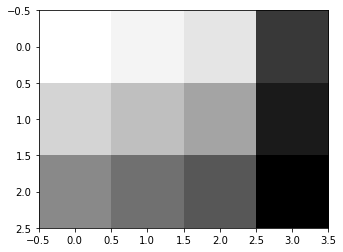

In [8]:
plt.imshow(image.reshape(3,4), cmap="Greys")

###### weight = (2,2,1,1)로 주는데 앞의 2,2는 kernel 값이고 다음 1은 RGB 그리고 마지막 1은 stride를 의미
- padding = same(image와 동일한 size) / valid(padding 없이 유효한 영역만 사용)
- padding을 SAME으로 줄 경우 W에 관계 없이 자동적으로 이미지 규격에 맞게 사이즈 맞춰줌
- padding을 VALID로 줄 경우 위의 W 값을 잘 적용해서 주어야 제대로 W에 맞게 사이즈가 출력됨
- 아래의 W는 2,2씩 움직이므로 최종 2,3의 값을 가진 값이 나오게 됨

image.shape (1, 3, 4, 1)
weight.shape (1, 1, 1, 1)
conv2d_img.shape (1, 3, 4, 1)
[[ 1.  2.  3. 10.]
 [ 4.  5.  6. 11.]
 [ 7.  8.  9. 12.]]


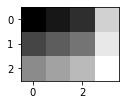

In [17]:
print("image.shape", image.shape)
# padding = SAME 시
#weight_filter3 = tf.constant([[[[1., 10, -1]], [[1., 10, -1]]],[[[1., 10, -1]],[[1., 10, -1]]]])
# padding = VAILD 시
# kernel = 1 일 때
weight_filter3 = tf.constant([[[[1.]]]])
# kernel = 2 일 때
#weight_filter3 = tf.constant([[[[1.]],[[1.]]],[[[1.]],[[1.]]]])
print("weight.shape", weight_filter3.shape)
# padding 값 다르게 주기 (same/valid)
# w 값 filter 다르게 주기
conv2d = tf.nn.conv2d(image, weight_filter3, strides=[1,1,1,1], padding="VALID")
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    #padding에 따라 reshpae가 달라짐 - same(3,3) / valid(2,2)
    print(one_img.reshape(3,4))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,4), cmap="gray")

In [12]:
image = np.array([[[[4],[3]],[[2],[1]]]], dtype=np.float32)

###### padding은 동일하고 각각의 값 4, 3, 2, 1  값 중에서 가장 큰 값을 pool해오므로 아래와 같이 4, 3, 2, 1의 값을 가져옴

In [13]:
pool = tf.nn.max_pool(image, ksize=[1,2,2,1],strides=[1,1,1,1], padding="SAME")
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]
